# types of feature scaling
  ### Standarization (z-score normalization)(in std mean=0, and standardDeviation =1 )
  ### Normalization
   ### minmaxScaler
   ### robust scaler
   used in 
    ## k-means
    ## k-nearest-neighbours
    ## principal component analysis
    ## Artificial neural network 
    ## Gradient Descent

In [46]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt 
import numpy as np 

In [6]:
df=pd.read_csv(r"https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day24-standardization/Social_Network_Ads.csv")

## removing userId and gender not required

In [11]:
df=df.iloc[:,2:]

In [12]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Train test Split

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop("Purchased",axis=1),df["Purchased"],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((280, 2), (120, 2))

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)## learn from training data and transform both train and test data 

x_train_scaled=scaler.transform(x_train) ## it returns numpy array 
x_test_scaled=scaler.transform(x_test)


In [20]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [69]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [26]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [29]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [30]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Before and after scaling graphical illustration 

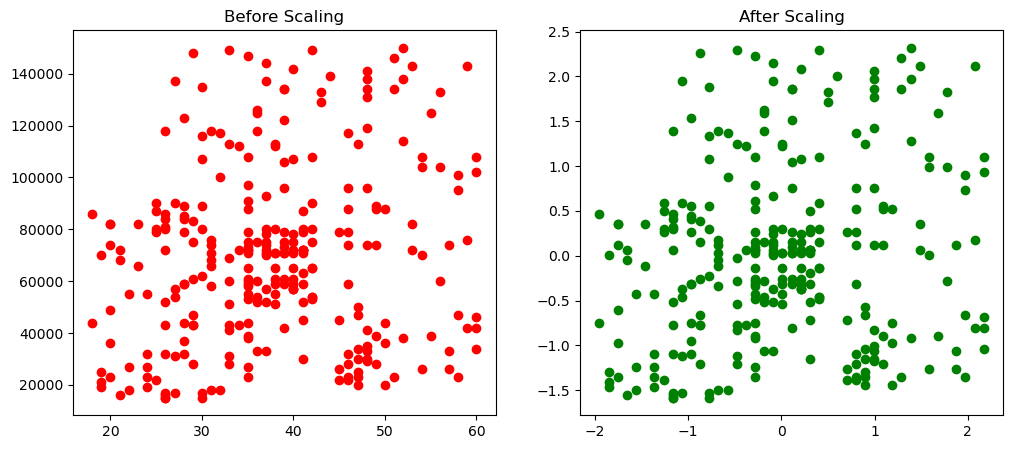

In [45]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train["Age"],x_train["EstimatedSalary"],color="red")
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled["Age"],x_train_scaled["EstimatedSalary"],color="green")
ax2.set_title("After Scaling")
plt.show()

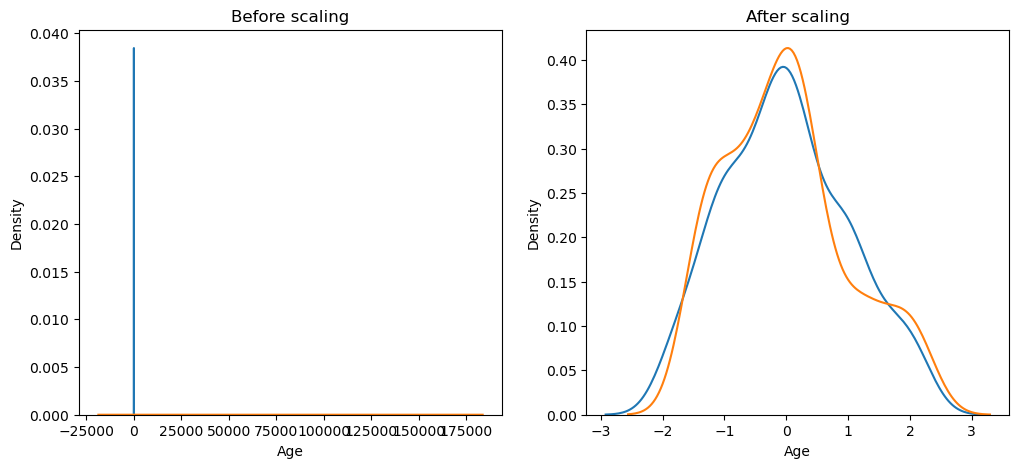

In [55]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
## before scaling 
ax1.set_title("Before scaling")
sns.kdeplot(x_train["Age"],ax=ax1)
sns.kdeplot(x_train["EstimatedSalary"],ax=ax1)

## After scaling 
ax2.set_title("After scaling")
sns.kdeplot(x_train_scaled["Age"],ax=ax2)
sns.kdeplot(x_train_scaled["EstimatedSalary"],ax=ax2)
plt.show()

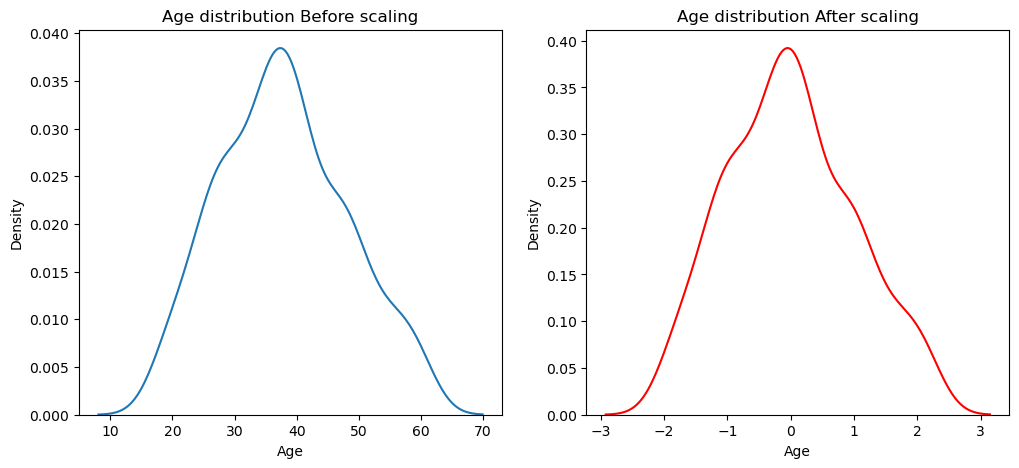

In [61]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
## before scaling 
ax1.set_title("Age distribution Before scaling")
sns.kdeplot(x_train["Age"],ax=ax1)
# sns.kdeplot(x_train["EstimatedSalary"],ax=ax1)

## After scaling 
ax2.set_title("Age distribution After scaling")
sns.kdeplot(x_train_scaled["Age"],ax=ax2,color="red")
# sns.kdeplot(x_train_scaled["EstimatedSalary"],ax=ax2)
plt.show()

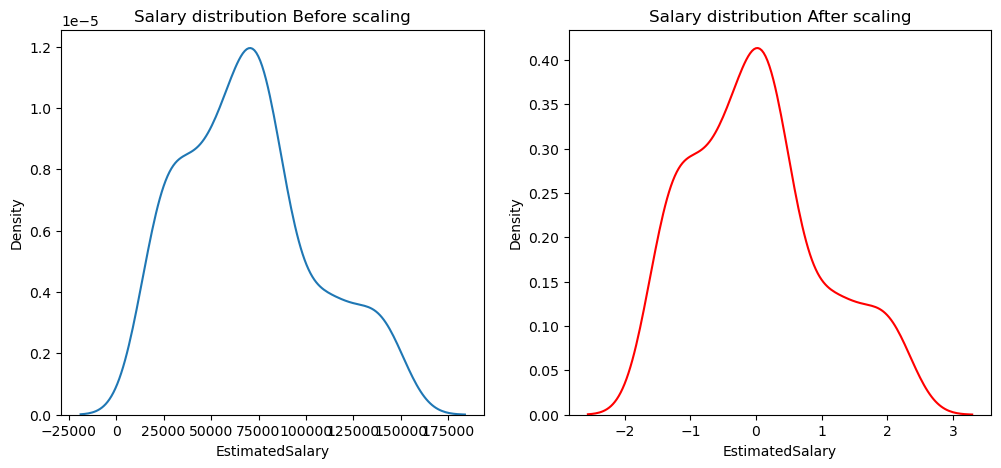

In [59]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
## before scaling 
ax1.set_title("Salary distribution Before scaling")
# sns.kdeplot(x_train["Age"],ax=ax1)
sns.kdeplot(x_train["EstimatedSalary"],ax=ax1)

## After scaling 
ax2.set_title("Salary distribution After scaling")
# sns.kdeplot(x_train_scaled["Age"],ax=ax2)
sns.kdeplot(x_train_scaled["EstimatedSalary"],ax=ax2,color="red")
plt.show()

## Why scaling is important illustrate with logistic regression model

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [67]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [71]:
y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
print("Actual Data Score ",accuracy_score(y_test,y_pred))
print("Scaled Data Score ",accuracy_score(y_test,y_pred_scaled))

Actual Data Score  0.6583333333333333
Scaled Data Score  0.8666666666666667


## scaling doesn't effect on decision tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [76]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [77]:
y_dt_predict=dt.predict(x_test)
y_dt_scaled_predict=dt_scaled.predict(x_test_scaled)

In [78]:
print("Actual Data Score ",accuracy_score(y_test,y_dt_predict))
print("Scaled Data Score ",accuracy_score(y_test,y_dt_scaled_predict))

Actual Data Score  0.875
Scaled Data Score  0.875


## outliers doesn't handle automatically in scaler

### need to handle outlier before using scaler